<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/sentiemen_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================#
# ANALISIS SENTIMEN TWITTER
# Case: Jude Bellingham @ Real Madrid
# ==============================#

In [ ]:
# 📦 Import Library
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
# 📥 Load Dataset
df = pd.read_csv('Jude_Bellingham_Real_Madrid.csv')
text_col = 'full_text'

In [ ]:
# 🔧 Setup NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# ==============================#
#  Preprocessing
# ==============================#

In [ ]:
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)        # Hapus link
    text = re.sub(r'@\w+|#\w+', '', text)                      # Hapus mention/hashtag
    text = re.sub(r'[^a-zA-Z\s]', '', text)                    # Hapus tanda baca
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


df['cleaned_text'] = df[text_col].apply(clean_text)

In [ ]:
# ==============================#
#  Labeling Sentimen
# ==============================#

In [ ]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    return 'neutral'


df['sentiment'] = df['cleaned_text'].apply(get_sentiment)



In [ ]:
# ==============================#
# Visualisasi
# ==============================#
# Distribusi Sentimen

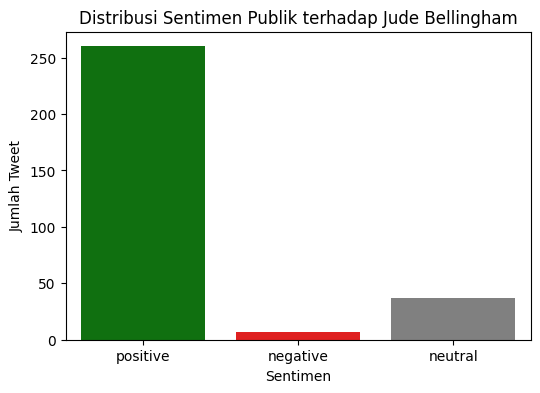

In [ ]:
import warnings
warnings.filterwarnings("ignore")  # Hilangkan warning yang muncul di atas grafik

plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df, palette={'positive': 'green', 'negative': 'red', 'neutral': 'gray'})
plt.title('Distribusi Sentimen Publik terhadap Jude Bellingham')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

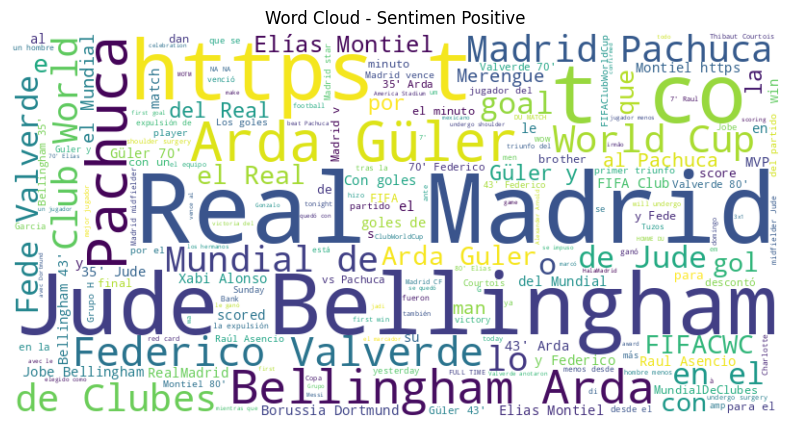

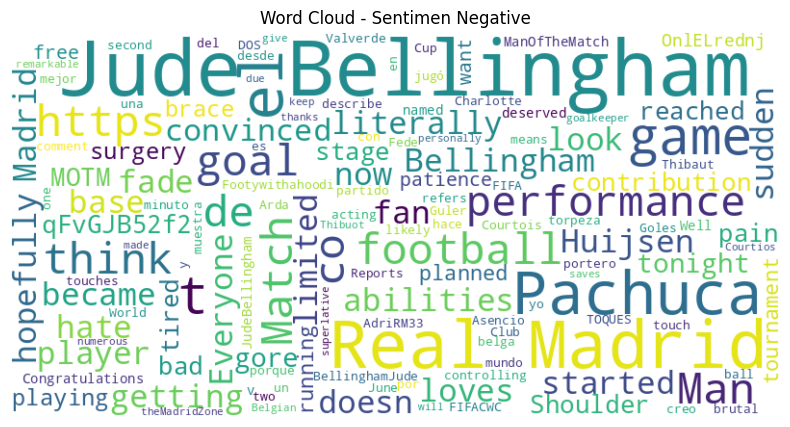

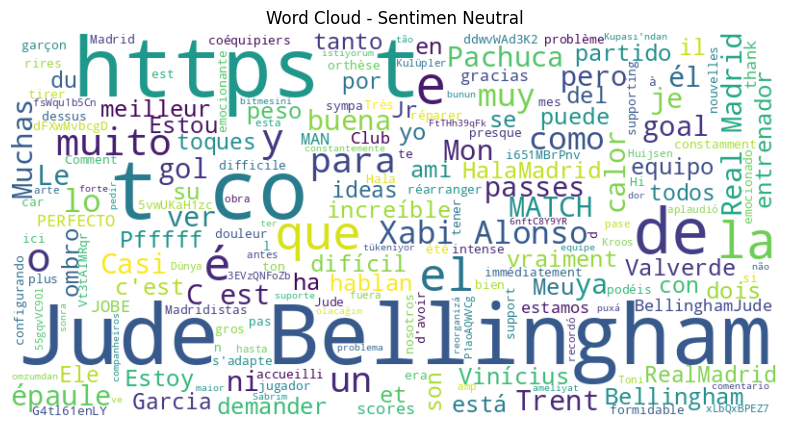

In [ ]:
# WordCloud untuk setiap Sentimen
for sent in ['positive', 'negative', 'neutral']:
    wc_text = ' '.join(df[df['sentiment'] == sent][text_col].dropna())
    if wc_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wc_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud - Sentimen {sent.capitalize()}')
        plt.show()

In [ ]:
# ==============================#
# Machine Learning Model
# ==============================#

In [ ]:
X = df['cleaned_text']
y = df['sentiment']

# Vektorisasi Teks
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# ==============================#
# Evaluasi Model
# ==============================#

In [ ]:
print("🔍 Akurasi Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Akurasi Model: 83.61%

📋 Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.67      0.40      0.50        10
    positive       0.89      0.92      0.90        51

    accuracy                           0.84        61
   macro avg       0.52      0.44      0.47        61
weighted avg       0.85      0.84      0.84        61



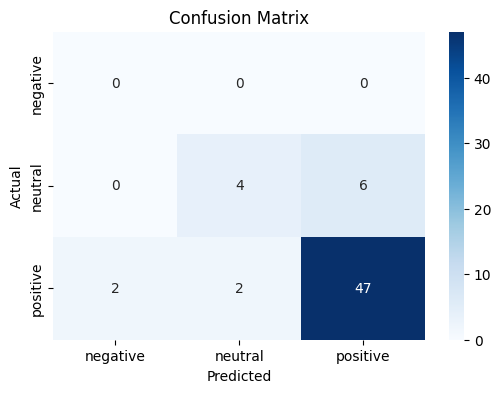

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()